In [62]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [15]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy, mean_squared_error # <== !!!
from tensorflow.keras.metrics import RootMeanSquaredError, MeanSquaredError

In [3]:
boston_data = load_boston()

In [105]:
#Загрузим датасет
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [106]:
#проверим пропуски
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [107]:
#посмотрим структуру
df.shape

(506, 14)

In [108]:
X = df.drop(['target'], axis=1)
y = df['target']

In [109]:
MinMaxSc = MinMaxScaler()
X_scaled = MinMaxSc.fit_transform(X)

In [110]:
#Разделим датасет на трен и тест
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=1)

In [99]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

**Эксперементы**

1 - 2 слоя, 5 эпох, 128 нейронов, оптимизатор - relu

In [119]:
X_train1, X_test1, y_train1, y_test1 = X_train, X_test, y_train, y_test

In [120]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss=['mean_squared_error'],
              metrics=['mean_squared_error'])

history = model.fit(
    X_train1,
    y_train1,
    epochs=5,
    batch_size=10
)

y_pred_test = model.predict(X_test1)
r2_score(y_test1, y_pred_test)


Epoch 1/5
38/38 [==============================] - 1s 2ms/step - loss: 165.7992 - mean_squared_error: 165.7992
Epoch 2/5
38/38 [==============================] - 0s 2ms/step - loss: 31.7658 - mean_squared_error: 31.7658
Epoch 3/5
38/38 [==============================] - 0s 2ms/step - loss: 23.4536 - mean_squared_error: 23.4536
Epoch 4/5
38/38 [==============================] - 0s 2ms/step - loss: 25.0678 - mean_squared_error: 25.0678
Epoch 5/5
38/38 [==============================] - 0s 3ms/step - loss: 23.2035 - mean_squared_error: 23.2035


0.8679340083349207

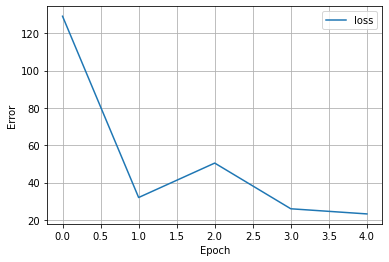

In [114]:
plot_loss(history)

In [121]:
itog = pd.DataFrame({'name': ['neron', 'epochs', 'layers', 'R2', 'mse'], '1': [128, 5, 2, 0.8679, 23.2035]})
itog

,name,1
0,neron,128.0000
1,epochs,5.0000
2,layers,2.0000
3,R2,0.8679
4,mse,23.2035


2 - 3 слоя, 5 эпох, 128 нейронов, оптимизатор - relu

In [122]:
X_train2, X_test2, y_train2, y_test2 = X_train, X_test, y_train, y_test

In [123]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss=['mean_squared_error'],
              metrics=['mean_squared_error'])

history = model.fit(
    X_train2,
    y_train2,
    epochs=5,
    batch_size=10
)

y_pred_test = model.predict(X_test2)
r2_score(y_test2, y_pred_test)


Epoch 1/5
38/38 [==============================] - 1s 2ms/step - loss: 879.5228 - mean_squared_error: 879.5227
Epoch 2/5
38/38 [==============================] - 0s 2ms/step - loss: 47.5180 - mean_squared_error: 47.5180
Epoch 3/5
38/38 [==============================] - 0s 2ms/step - loss: 31.6594 - mean_squared_error: 31.6594
Epoch 4/5
38/38 [==============================] - 0s 2ms/step - loss: 35.3883 - mean_squared_error: 35.3883
Epoch 5/5
38/38 [==============================] - 0s 3ms/step - loss: 39.8861 - mean_squared_error: 39.8861


0.5818726556891276

In [124]:
itog['2'] = [128, 5, 3, 0.58, 39.8861]
itog

,name,1,2
0,neron,128.0000,128.0000
1,epochs,5.0000,5.0000
2,layers,2.0000,3.0000
3,R2,0.8679,0.5800
4,mse,23.2035,39.8861


3 - 3 слоя, 5 эпох, 256 нейронов, оптимизатор - relu

In [125]:
X_train3, X_test3, y_train3, y_test3 = X_train, X_test, y_train, y_test

In [126]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss=['mean_squared_error'],
              metrics=['mean_squared_error'])

history = model.fit(
    X_train3,
    y_train3,
    epochs=5,
    batch_size=10
)

y_pred_test = model.predict(X_test3)
r2_score(y_test3, y_pred_test)


Epoch 1/5
38/38 [==============================] - 1s 2ms/step - loss: 446.2158 - mean_squared_error: 446.2158
Epoch 2/5
38/38 [==============================] - 0s 2ms/step - loss: 41.2351 - mean_squared_error: 41.2351
Epoch 3/5
38/38 [==============================] - 0s 2ms/step - loss: 32.6530 - mean_squared_error: 32.6530
Epoch 4/5
38/38 [==============================] - 0s 3ms/step - loss: 44.4575 - mean_squared_error: 44.4575
Epoch 5/5
38/38 [==============================] - 0s 3ms/step - loss: 34.9009 - mean_squared_error: 34.9009


0.6696493663853074

In [127]:
itog['3'] = [256, 5, 3, 0.66, 34.9009]
itog

,name,1,2,3
0,neron,128.0000,128.0000,256.0000
1,epochs,5.0000,5.0000,5.0000
2,layers,2.0000,3.0000,3.0000
3,R2,0.8679,0.5800,0.6600
4,mse,23.2035,39.8861,34.9009


4 - 3 слоя, 10 эпох, 256 нейронов, оптимизатор - relu

In [129]:
X_train4, X_test4, y_train4, y_test4 = X_train, X_test, y_train, y_test

In [130]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss=['mean_squared_error'],
              metrics=['mean_squared_error'])

history = model.fit(
    X_train4,
    y_train4,
    epochs=10,
    batch_size=10
)

y_pred_test = model.predict(X_test4)
r2_score(y_test4, y_pred_test)


Epoch 1/10
38/38 [==============================] - 1s 3ms/step - loss: 908.5101 - mean_squared_error: 908.5101
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 45.0523 - mean_squared_error: 45.0523
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 31.2987 - mean_squared_error: 31.2987
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 30.5083 - mean_squared_error: 30.5083
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 34.4227 - mean_squared_error: 34.4227
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 25.0742 - mean_squared_error: 25.0742
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 31.1206 - mean_squared_error: 31.1206
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 21.7799 - mean_squared_error: 21.7799
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 21.0715 - mean_squared_error: 21.0715
Epoch 10

0.845463553952503

In [131]:
itog['4'] = [256, 10, 3, 0.84, 32.6266]
itog

,name,1,2,3,4
0,neron,128.0000,128.0000,256.0000,256.0000
1,epochs,5.0000,5.0000,5.0000,10.0000
2,layers,2.0000,3.0000,3.0000,3.0000
3,R2,0.8679,0.5800,0.6600,0.8400
4,mse,23.2035,39.8861,34.9009,32.6266


5 - 3 слоя, 10 эпох, 256 нейронов, оптимизатор - RMSprop

In [132]:
X_train5, X_test5, y_train5, y_test5 = X_train, X_test, y_train, y_test

In [133]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.1),
              loss=['mean_squared_error'],
              metrics=['mean_squared_error'])

history = model.fit(
    X_train5,
    y_train5,
    epochs=10,
    batch_size=10
)

y_pred_test = model.predict(X_test5)
r2_score(y_test5, y_pred_test)


Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 1768225.3750 - mean_squared_error: 1768225.3750
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 83.6254 - mean_squared_error: 83.6254
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 64.2360 - mean_squared_error: 64.2360
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 100.1854 - mean_squared_error: 100.1854
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 142.7933 - mean_squared_error: 142.7933
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 142.4360 - mean_squared_error: 142.4360
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 109.7993 - mean_squared_error: 109.7993
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 48.0242 - mean_squared_error: 48.0242
Epoch 9/10
38/38 [==============================] - 0s 3ms/step - loss: 57.8394 - mean_squared_error: 

0.6203264407122673

In [134]:
itog['5'] = [256, 10, 3, 0.62, 41.8968]
itog

,name,1,2,3,4,5
0,neron,128.0000,128.0000,256.0000,256.0000,256.0000
1,epochs,5.0000,5.0000,5.0000,10.0000,10.0000
2,layers,2.0000,3.0000,3.0000,3.0000,3.0000
3,R2,0.8679,0.5800,0.6600,0.8400,0.6200
4,mse,23.2035,39.8861,34.9009,32.6266,41.8968


6 - 4 слоя, 50 эпох, 256 нейронов, оптимизатор - Adam

In [137]:
X_train6, X_test6, y_train6, y_test6 = X_train, X_test, y_train, y_test

In [138]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss=['mean_squared_error'],
              metrics=['mean_squared_error'])

history = model.fit(
    X_train6,
    y_train6,
    epochs=50,
    batch_size=1
)

y_pred_test = model.predict(X_test6)
r2_score(y_test6, y_pred_test)


Epoch 1/50
379/379 [==============================] - 1s 2ms/step - loss: 108.1667 - mean_squared_error: 108.1667
Epoch 2/50
379/379 [==============================] - 1s 2ms/step - loss: 79.7969 - mean_squared_error: 79.7969
Epoch 3/50
379/379 [==============================] - 1s 2ms/step - loss: 87.5936 - mean_squared_error: 87.5936
Epoch 4/50
379/379 [==============================] - 1s 2ms/step - loss: 86.4110 - mean_squared_error: 86.4110
Epoch 5/50
379/379 [==============================] - 1s 2ms/step - loss: 83.0788 - mean_squared_error: 83.0788
Epoch 6/50
379/379 [==============================] - 1s 2ms/step - loss: 83.5126 - mean_squared_error: 83.5126
Epoch 7/50
379/379 [==============================] - 1s 2ms/step - loss: 82.7987 - mean_squared_error: 82.7987
Epoch 8/50
379/379 [==============================] - 1s 2ms/step - loss: 81.3727 - mean_squared_error: 81.3727
Epoch 9/50
379/379 [==============================] - 1s 2ms/step - loss: 82.2969 - mean_squared_error

-0.0040683051923817715

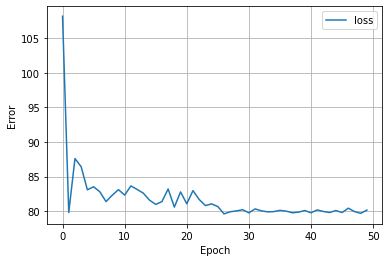

In [139]:
plot_loss(history)

In [140]:
itog['6'] = [256, 50, 3, 0.0040, 80.1507]
itog

,name,1,2,3,4,5,6
0,neron,128.0000,128.0000,256.0000,256.0000,256.0000,256.0000
1,epochs,5.0000,5.0000,5.0000,10.0000,10.0000,50.0000
2,layers,2.0000,3.0000,3.0000,3.0000,3.0000,3.0000
3,R2,0.8679,0.5800,0.6600,0.8400,0.6200,0.0040
4,mse,23.2035,39.8861,34.9009,32.6266,41.8968,80.1507


7 - 5 слоя, 25 эпох, 300 нейронов, оптимизатор - Adam

In [141]:
X_train7, X_test7, y_train7, y_test7 = X_train, X_test, y_train, y_test

In [144]:
model = tf.keras.Sequential([
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss=['mean_squared_error'],
              metrics=['mean_squared_error'])

history = model.fit(
    X_train7,
    y_train7,
    epochs=25,
    batch_size=5
)

y_pred_test = model.predict(X_test7)
r2_score(y_test7, y_pred_test)


Epoch 1/25
76/76 [==============================] - 1s 4ms/step - loss: 1029453.1875 - mean_squared_error: 1029453.0625
Epoch 2/25
76/76 [==============================] - 0s 4ms/step - loss: 57.0728 - mean_squared_error: 57.0728
Epoch 3/25
76/76 [==============================] - 0s 4ms/step - loss: 55.3679 - mean_squared_error: 55.3679
Epoch 4/25
76/76 [==============================] - 0s 4ms/step - loss: 36.2136 - mean_squared_error: 36.2136
Epoch 5/25
76/76 [==============================] - 0s 4ms/step - loss: 68.0643 - mean_squared_error: 68.0643
Epoch 6/25
76/76 [==============================] - 0s 4ms/step - loss: 35.2026 - mean_squared_error: 35.2026
Epoch 7/25
76/76 [==============================] - 0s 4ms/step - loss: 33.3093 - mean_squared_error: 33.3093
Epoch 8/25
76/76 [==============================] - 0s 4ms/step - loss: 27410.1953 - mean_squared_error: 27410.1953
Epoch 9/25
76/76 [==============================] - 0s 4ms/step - loss: 555.1580 - mean_squared_error: 5

-1.2873296802257994

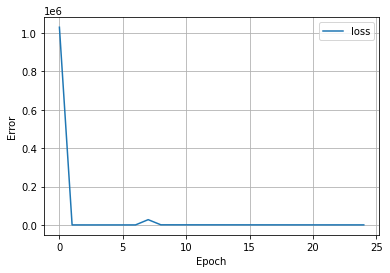

In [147]:
plot_loss(history)

In [153]:
itog['7'] = [300, 25, 5, -1.2873, 198.2631]
itog

,name,1,2,3,4,5,6,7
0,neron,128.0000,128.0000,256.0000,256.0000,256.0000,256.0000,300.0000
1,epochs,5.0000,5.0000,5.0000,10.0000,10.0000,50.0000,25.0000
2,layers,2.0000,3.0000,3.0000,3.0000,3.0000,3.0000,5.0000
3,R2,0.8679,0.5800,0.6600,0.8400,0.6200,0.0040,-1.2873
4,mse,23.2035,39.8861,34.9009,32.6266,41.8968,80.1507,198.2631


8 - 4 слоя, 25 эпох, 64 нейронов, оптимизатор - Adam

In [148]:
X_train8, X_test8, y_train8, y_test8 = X_train, X_test, y_train, y_test

In [149]:
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss=['mean_squared_error'],
              metrics=['mean_squared_error'])

history = model.fit(
    X_train8,
    y_train8,
    epochs=25,
    batch_size=5
)

y_pred_test = model.predict(X_test8)
r2_score(y_test8, y_pred_test)


Epoch 1/25
76/76 [==============================] - 1s 2ms/step - loss: 212.2099 - mean_squared_error: 212.2099
Epoch 2/25
76/76 [==============================] - 0s 3ms/step - loss: 46.5302 - mean_squared_error: 46.5302
Epoch 3/25
76/76 [==============================] - 0s 3ms/step - loss: 32.0982 - mean_squared_error: 32.0982
Epoch 4/25
76/76 [==============================] - 0s 3ms/step - loss: 36.4719 - mean_squared_error: 36.4719
Epoch 5/25
76/76 [==============================] - 0s 2ms/step - loss: 27.6236 - mean_squared_error: 27.6236
Epoch 6/25
76/76 [==============================] - 0s 2ms/step - loss: 29.0737 - mean_squared_error: 29.0737
Epoch 7/25
76/76 [==============================] - 0s 2ms/step - loss: 27.8196 - mean_squared_error: 27.8196
Epoch 8/25
76/76 [==============================] - 0s 2ms/step - loss: 30.0450 - mean_squared_error: 30.0450
Epoch 9/25
76/76 [==============================] - 0s 2ms/step - loss: 32.0747 - mean_squared_error: 32.0747
Epoch 10

0.8351869058525917

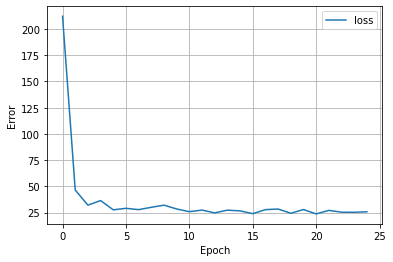

In [150]:
plot_loss(history)

In [154]:
itog['8'] = [64, 25, 4, 0.8351, 25.7741]
itog

,name,1,2,3,4,5,6,7,8
0,neron,128.0000,128.0000,256.0000,256.0000,256.0000,256.0000,300.0000,64.0000
1,epochs,5.0000,5.0000,5.0000,10.0000,10.0000,50.0000,25.0000,25.0000
2,layers,2.0000,3.0000,3.0000,3.0000,3.0000,3.0000,5.0000,4.0000
3,R2,0.8679,0.5800,0.6600,0.8400,0.6200,0.0040,-1.2873,0.8351
4,mse,23.2035,39.8861,34.9009,32.6266,41.8968,80.1507,198.2631,25.7741


9 - 3 слоя, 15 эпох, 64 нейронов, оптимизатор - Adam

In [161]:
X_train9, X_test9, y_train9, y_test9 = X_train, X_test, y_train, y_test

In [163]:
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss=['mean_squared_error'],
              metrics=['mean_squared_error'])

history = model.fit(
    X_train9,
    y_train9,
    epochs=15,
    batch_size=5
)

y_pred_test = model.predict(X_test9)
r2_score(y_test9, y_pred_test)


Epoch 1/15
76/76 [==============================] - 1s 2ms/step - loss: 85.9285 - mean_squared_error: 85.9285
Epoch 2/15
76/76 [==============================] - 0s 2ms/step - loss: 42.1617 - mean_squared_error: 42.1617
Epoch 3/15
76/76 [==============================] - 0s 2ms/step - loss: 26.9696 - mean_squared_error: 26.9696
Epoch 4/15
76/76 [==============================] - 0s 3ms/step - loss: 38.3193 - mean_squared_error: 38.3193
Epoch 5/15
76/76 [==============================] - 0s 3ms/step - loss: 30.7586 - mean_squared_error: 30.7586
Epoch 6/15
76/76 [==============================] - 0s 3ms/step - loss: 45.7997 - mean_squared_error: 45.7997
Epoch 7/15
76/76 [==============================] - 0s 2ms/step - loss: 23.3716 - mean_squared_error: 23.3716
Epoch 8/15
76/76 [==============================] - 0s 2ms/step - loss: 23.9266 - mean_squared_error: 23.9266
Epoch 9/15
76/76 [==============================] - 0s 2ms/step - loss: 29.1318 - mean_squared_error: 29.1318
Epoch 10/1

0.8620061056903104

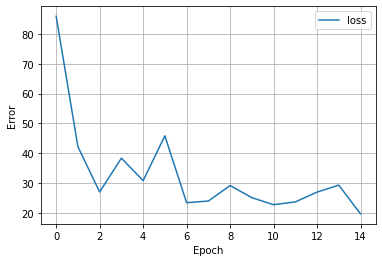

In [164]:
plot_loss(history)

In [165]:
itog['9'] = [64, 15, 3, 0.8620, 19.6069]
itog

,name,1,2,3,4,5,6,7,8,9
0,neron,128.0000,128.0000,256.0000,256.0000,256.0000,256.0000,300.0000,64.0000,64.0000
1,epochs,5.0000,5.0000,5.0000,10.0000,10.0000,50.0000,25.0000,25.0000,15.0000
2,layers,2.0000,3.0000,3.0000,3.0000,3.0000,3.0000,5.0000,4.0000,3.0000
3,R2,0.8679,0.5800,0.6600,0.8400,0.6200,0.0040,-1.2873,0.8351,0.8620
4,mse,23.2035,39.8861,34.9009,32.6266,41.8968,80.1507,198.2631,25.7741,19.6069


Вывод:

Большое количество эпох, слоев и нейронов увеличивает переобученность модели.

Для получения лучшкго качества необходимо нахождение баланса.